# Analysis of WSPs for quantifying hardness

## Setting Up Imports

In [1]:
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_pickle("results.pkl")
df["wsp_8.0/point"] = df["wsp_count_8.0"] / df["num_points"]
df["wsp_4.0/point"] = df["wsp_count_4.0"] / df["num_points"]
df["wsp_2.0/point"] = df["wsp_count_2.0"] / df["num_points"]
df["wsp_1.0/point"] = df["wsp_count_1.0"] / df["num_points"]


print("Number of optimatlly solved instances: ", df["opt_len"].isna().sum())

df

Number of optimatlly solved instances:  56


,num_points,opt_len,nn_len,untouched_len,nwsp5_2_len,nwsp5_len,wsp_count_2.0,ls_len,ls_q_len,wsp_count_1.0,wsp_count_4.0,wsp_count_8.0,wsp_count_16.0,wsp_8.0/point,wsp_4.0/point,wsp_2.0/point,wsp_1.0/point
name,,,,,,,,,,,,,,,,,
a280,280,2.586770e+03,3.161004e+03,4.847061e+03,NaN,NaN,2571,2769.255661,2956.917525,1519.0,4848.0,9717.0,18702.0,34.703571,17.314286,9.182143,5.425
ara238025,238025,NaN,7.591498e+05,1.176390e+06,NaN,NaN,3032365,NaN,NaN,1590993.0,7230297.0,20728874.0,NaN,87.086961,30.376208,12.739691,6.684142
bby34656,34656,NaN,1.253833e+05,1.966541e+05,NaN,NaN,412676,NaN,NaN,218229.0,983838.0,2777309.0,8525205.0,80.139341,28.388677,11.907779,6.297005
bbz25234,25234,NaN,8.772034e+04,1.414553e+05,NaN,NaN,299703,NaN,NaN,162055.0,706535.0,1949833.0,5818347.0,77.270072,27.999326,11.876952,6.422089
bch2762,2762,NaN,1.073362e+04,1.624823e+04,NaN,NaN,28611,NaN,NaN,16449.0,66452.0,165582.0,411407.0,59.950036,24.059377,10.358798,5.955467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tnm85,85,1.117368e+06,1.257389e+06,1.143585e+07,NaN,NaN,463,NaN,NaN,317.0,828.0,1411.0,2358.0,16.6,9.741176,5.447059,3.729412
Tnm88,88,1.172726e+06,1.320711e+06,1.243584e+07,NaN,NaN,475,NaN,NaN,303.0,837.0,1413.0,2482.0,16.056818,9.511364,5.397727,3.443182
Tnm91,91,1.228712e+06,1.338013e+06,1.347724e+07,NaN,NaN,461,NaN,NaN,304.0,819.0,1441.0,2519.0,15.835165,9.0,5.065934,3.340659


## Calculating and Plotting global WSP density

256


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          wsp_count_4.0   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              5794.
Date:                Fri, 16 May 2025   Prob (F-statistic):                   2.40e-177
Time:                        13:20:39   Log-Likelihood:                         -3575.4
No. Observations:                 256   AIC:                                      7153.
Df Residuals:                     255   BIC:                                      7156.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
num_points    41.8278      0.550     76.116      0.000      40.746      42.910
==============================================================================
Omnibus:                      192.322   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18098.070
Skew:                          -2.127   Prob(JB):                         0.00
Kurtosis:                      43.971   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

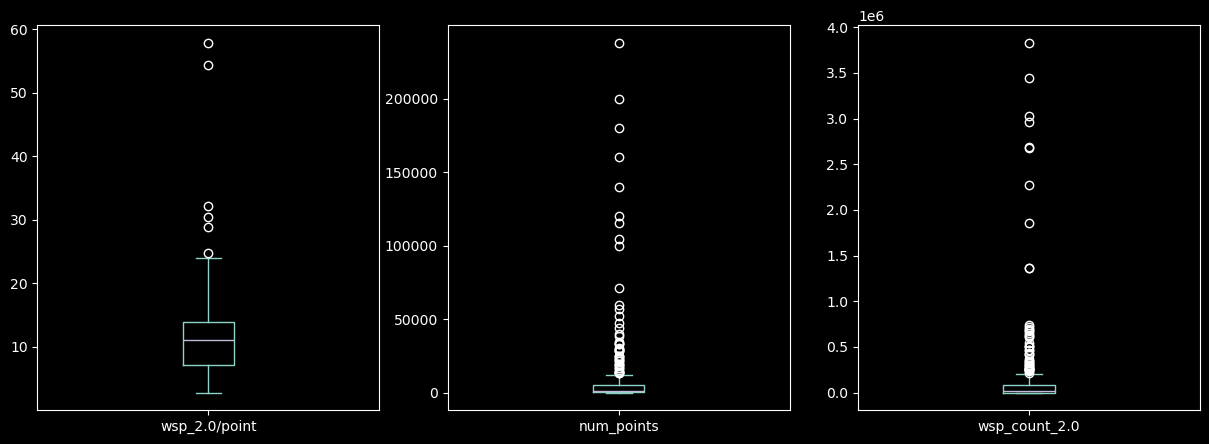

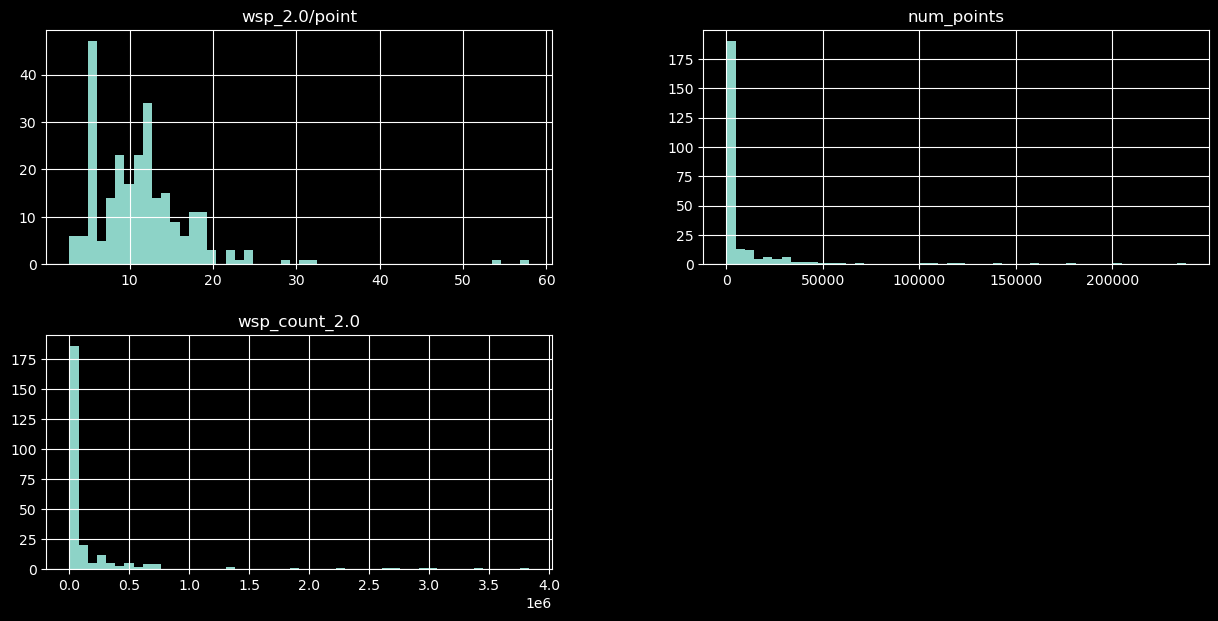

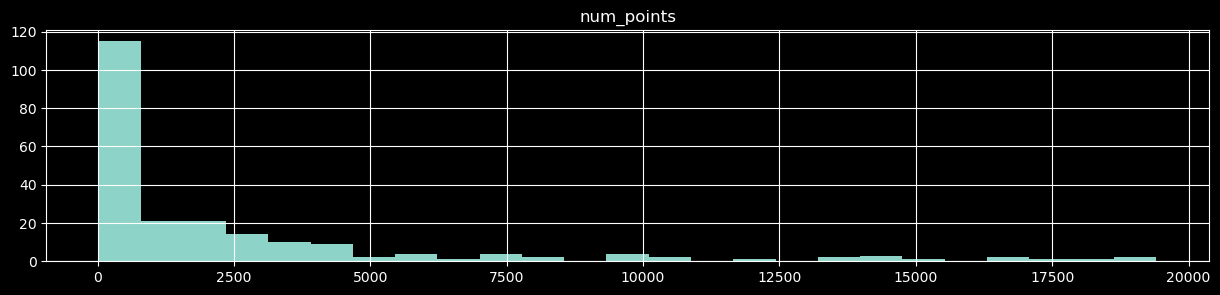

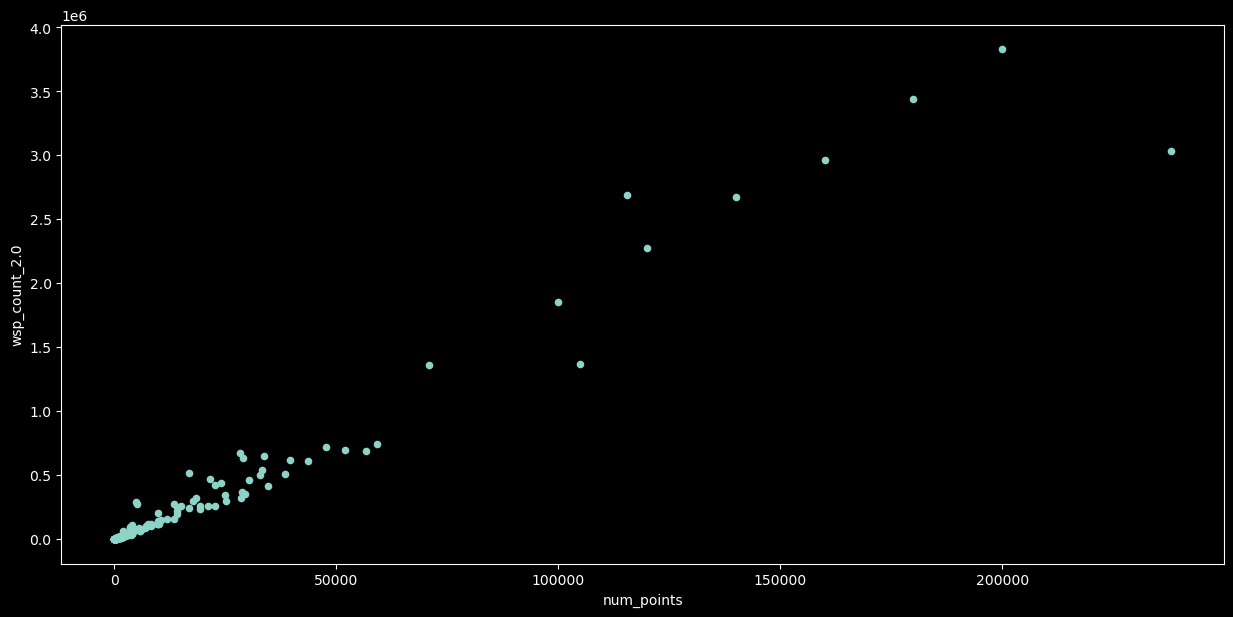

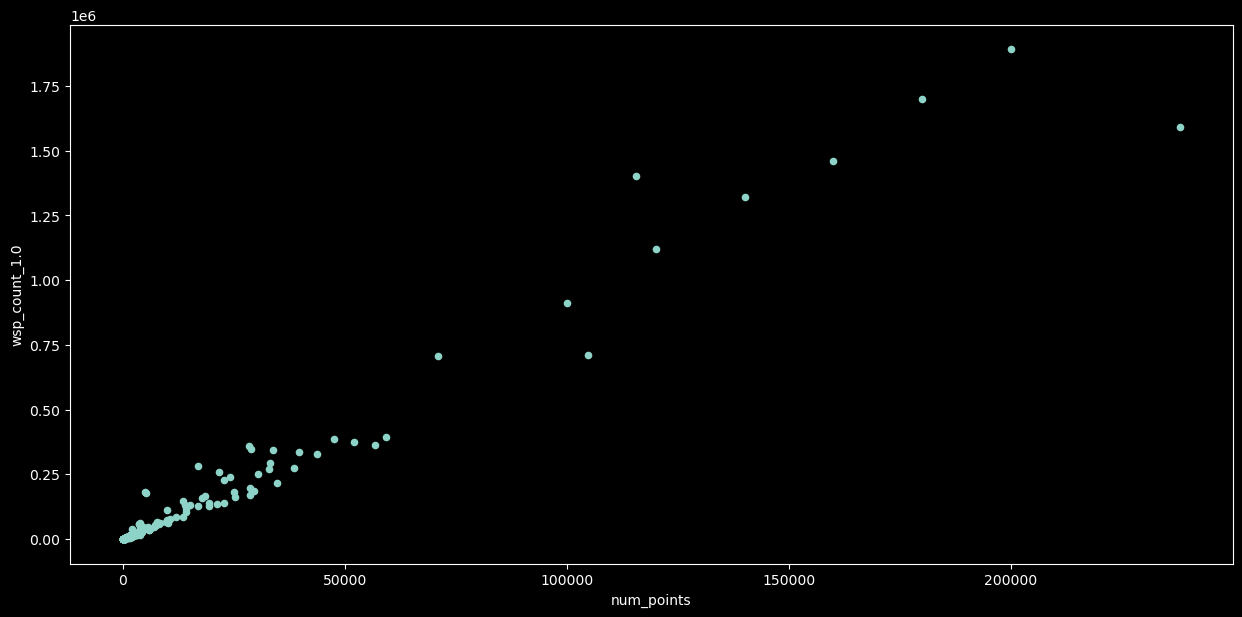

In [2]:
# Remove NAN wsp_counts and tell cells their format
df = df[~df['wsp_count_4.0'].isna()]
df = df[~df['wsp_count_2.0'].isna()]
df = df[~df['wsp_count_1.0'].isna()]
print(len(df))

fig, axs = plt.subplots(1,3, figsize=(15,5))
df["wsp_2.0/point"].plot.box(ax=axs[0])
df["num_points"].plot.box(ax=axs[1])
df["wsp_count_2.0"].plot.box(ax=axs[2])

df.hist(column=["wsp_2.0/point", "num_points", "wsp_count_2.0"], bins=50, figsize=(15,7))
df[df["num_points"] < 20000].hist(column=["num_points"], bins=25, figsize=(15,3))

df.plot.scatter("num_points", "wsp_count_2.0", figsize=(15,7)) # TODO: make this graph look better

df.plot.scatter("num_points", "wsp_count_1.0", figsize=(15,7),) # TODO: make this graph look better

results = sm.OLS(df["wsp_count_4.0"].astype(int), df["num_points"].astype(int)).fit()
results.summary()

# Comparisons of different separation metrics

<Axes: xlabel='wsp_count_1.0', ylabel='wsp_count_2.0'>

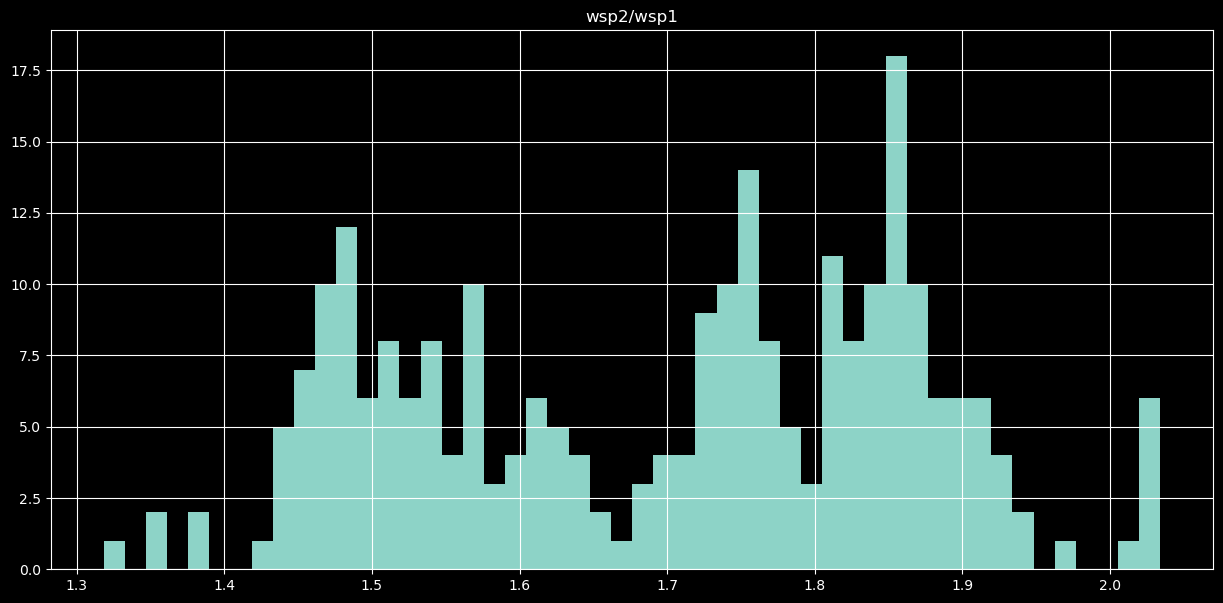

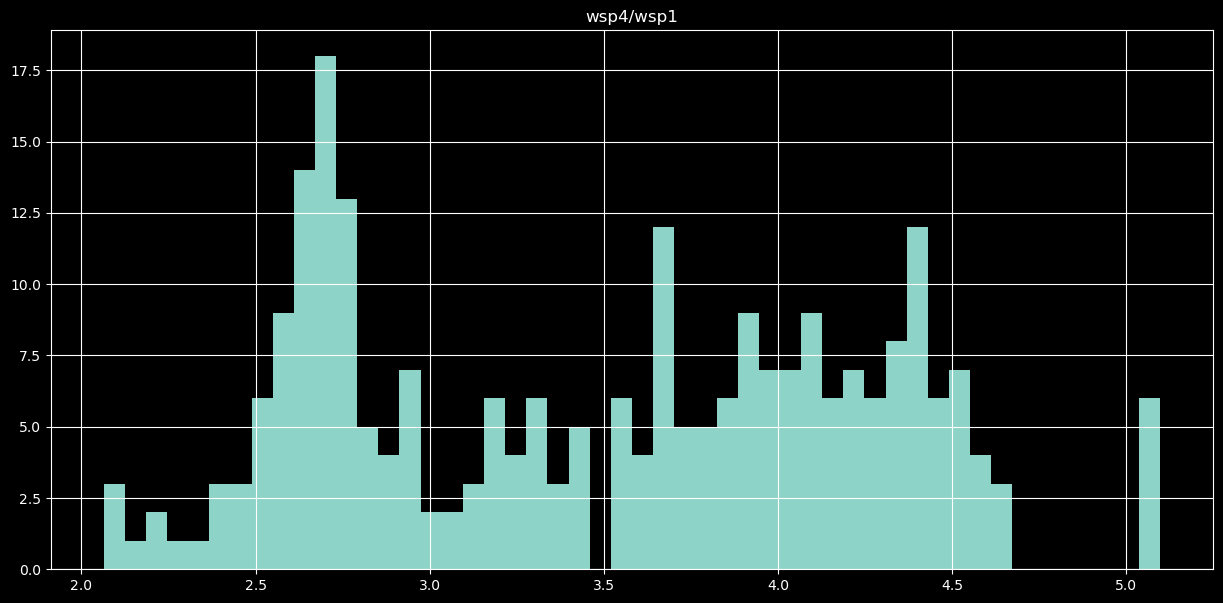

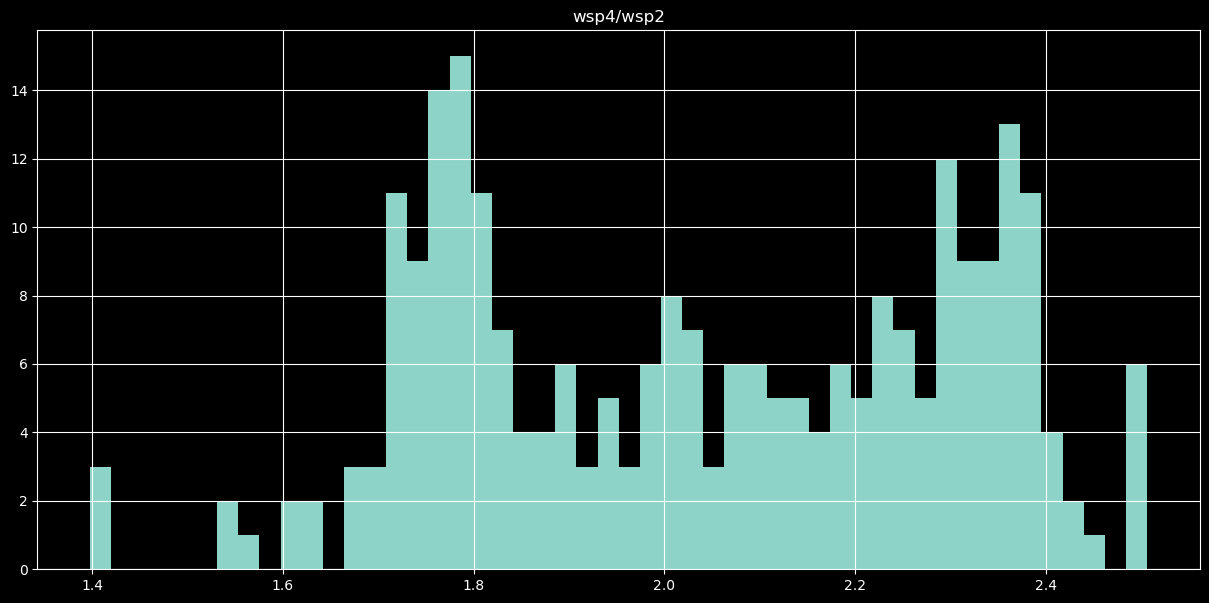

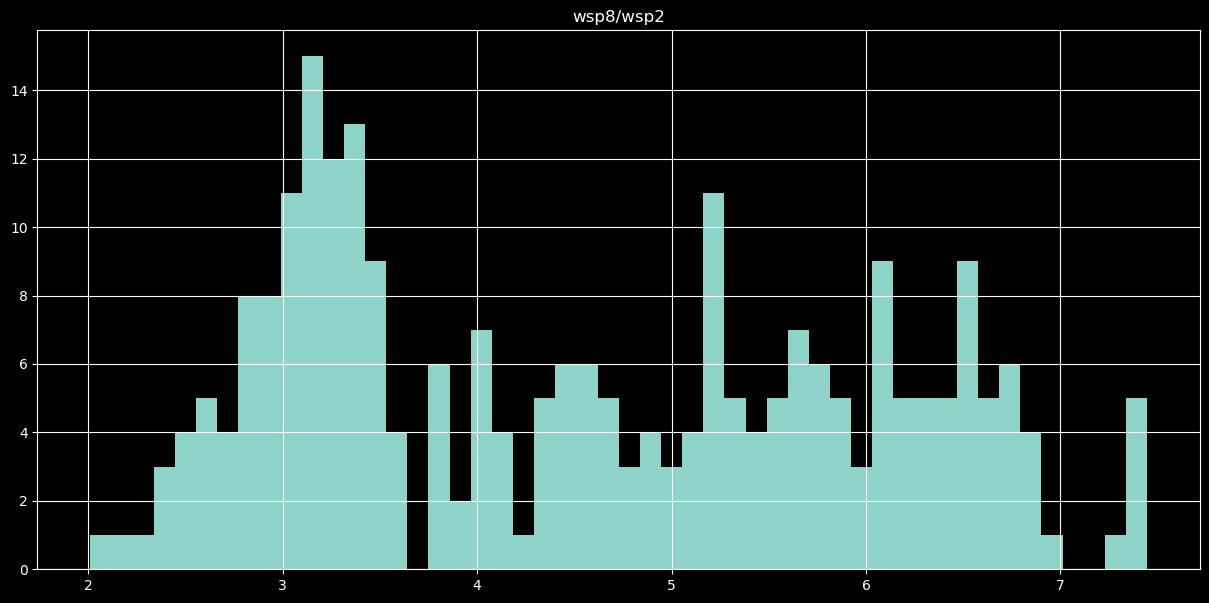

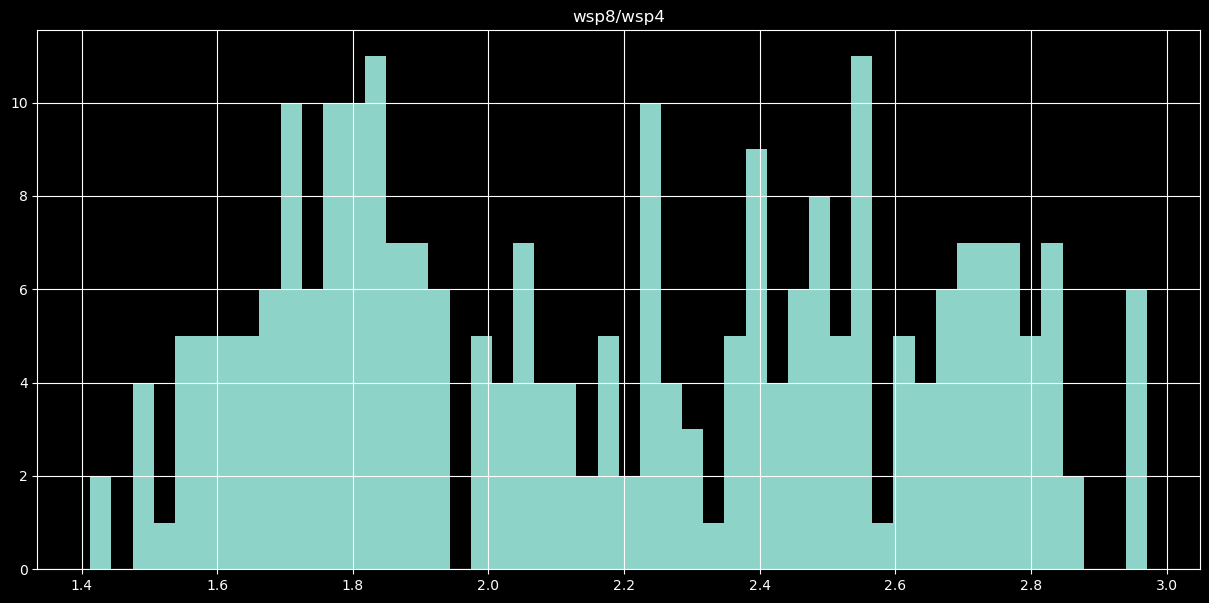

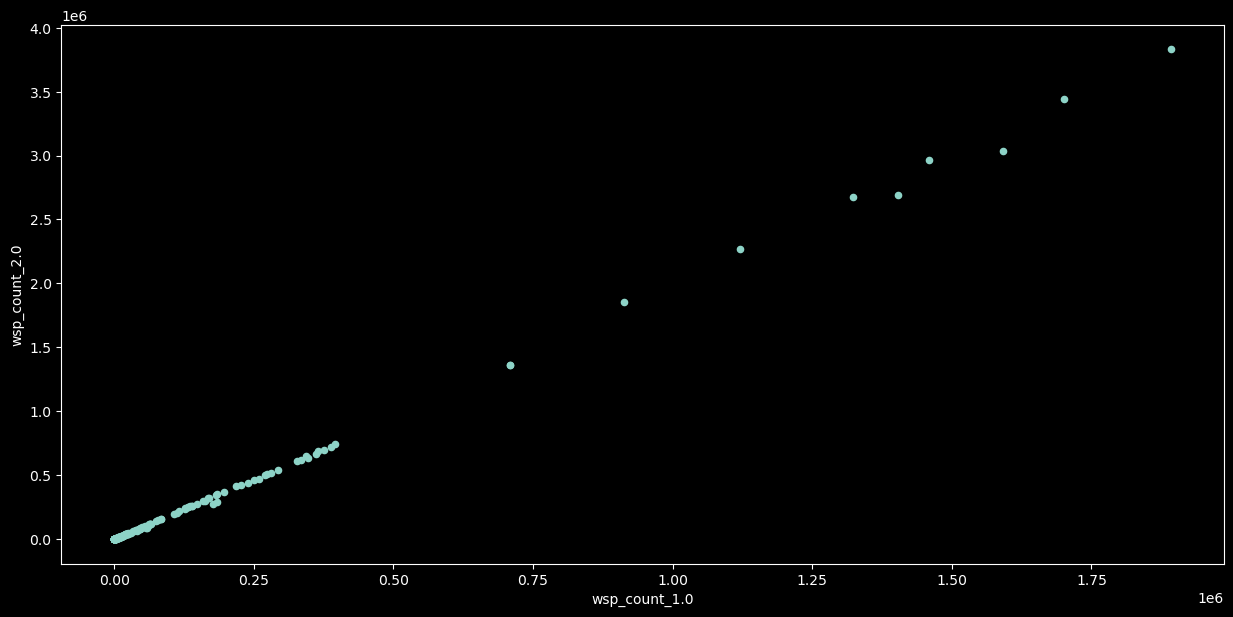

In [3]:
df["wsp2/wsp1"] = df["wsp_count_2.0"] / df["wsp_count_1.0"]
df["wsp4/wsp1"] = df["wsp_count_4.0"] / df["wsp_count_1.0"]
df["wsp4/wsp2"] = df["wsp_count_4.0"] / df["wsp_count_2.0"]
df["wsp8/wsp2"] = df["wsp_count_8.0"] / df["wsp_count_2.0"]
df["wsp8/wsp4"] = df["wsp_count_8.0"] / df["wsp_count_4.0"]
df.hist(column=["wsp2/wsp1"], bins=50, figsize=(15,7))
df.hist(column=["wsp4/wsp1"], bins=50, figsize=(15,7))
df.hist(column=["wsp4/wsp2"], bins=50, figsize=(15,7))
df.hist(column=["wsp8/wsp2"], bins=50, figsize=(15,7))
df.hist(column=["wsp8/wsp4"], bins=50, figsize=(15,7))
df.plot.scatter("wsp_count_1.0", "wsp_count_2.0", figsize=(15,7))

## Remove problems which don't have a optimum (or near optimum) solution

In [4]:
df = df[~df['opt_len'].isna()] # remove problems without optimal lens

## Calculate the error for each algorithm to the optimum (or near optimum)

In [5]:
df["nn error"] = df["nn_len"] / df["opt_len"] - 1.0
df['ls error'] = df["ls_len"] / df["opt_len"] - 1.0
df["lsq error"] = df["ls_q_len"] / df["opt_len"] - 1.0
print(len(df))
df["num_points"].describe()

202


/var/folders/_t/4_m8pb3d3xs763zf2ztl10k40000gn/T/ipykernel_26957/3812308172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nn error"] = df["nn_len"] / df["opt_len"] - 1.0
/var/folders/_t/4_m8pb3d3xs763zf2ztl10k40000gn/T/ipykernel_26957/3812308172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ls error'] = df["ls_len"] / df["opt_len"] - 1.0
/var/folders/_t/4_m8pb3d3xs763zf2ztl10k40000gn/T/ipykernel_26957/3812308172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

count           202.0
mean      8079.881188
std      27720.343588
min              29.0
25%            136.75
50%             437.5
75%           2316.25
max          200000.0
Name: num_points, dtype: Float64

## Plot analysis of WSPs hardness wrt. nearest neighbour

wsp_1.0/point   -0.046980
wsp_2.0/point    0.076396
wsp_4.0/point   -0.007325
wsp_8.0/point   -0.003069
dtype: float64
Average residual is 5.520563697637133%
50pp residual is 3.7565937472133353% and 75pp residual is 6.931243512237023%


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               nn error   R-squared (uncentered):                   0.876
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              348.8
Date:                Fri, 16 May 2025   Prob (F-statistic):                    1.96e-88
Time:                        13:21:27   Log-Likelihood:                          222.12
No. Observations:                 202   AIC:                                     -436.2
Df Residuals:                     198   BIC:                                     -423.0
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
wsp_1.0/point    -0.0470      0.020     -2.307      0.022      -0.087      -0.007
wsp_2.0/point     0.0764      0.018      4.144      0.000       0.040       0.113
wsp_4.0/point    -0.0073      0.010     -0.705      0.481      -0.028       0.013
wsp_8.0/point    -0.0031      0.002     -1.513      0.132      -0.007       0.001
==============================================================================
Omnibus:                       27.360   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.232
Skew:                          -0.179   Prob(JB):                     1.45e-33
Kurtosis:                       7.224   Cond. No.                         294.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

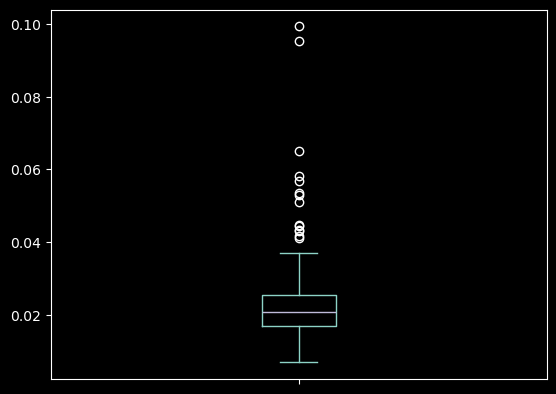

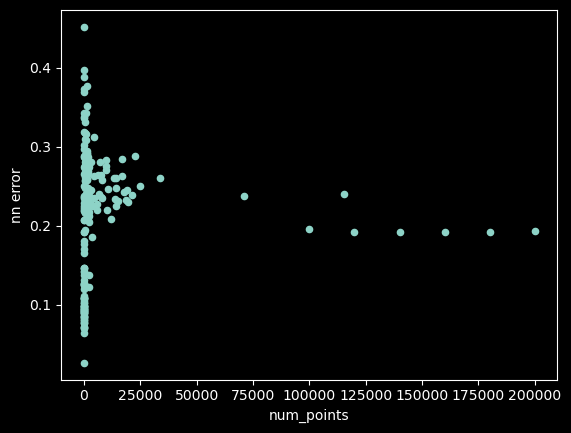

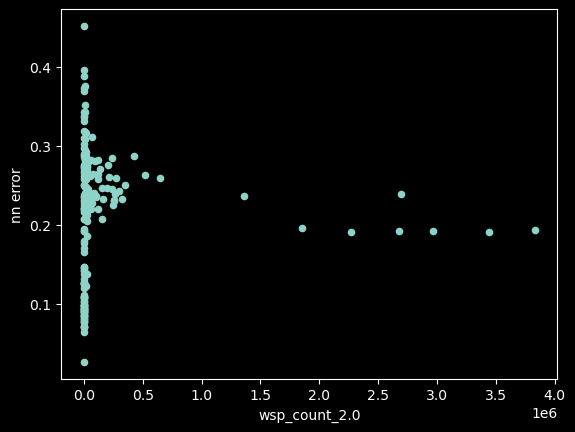

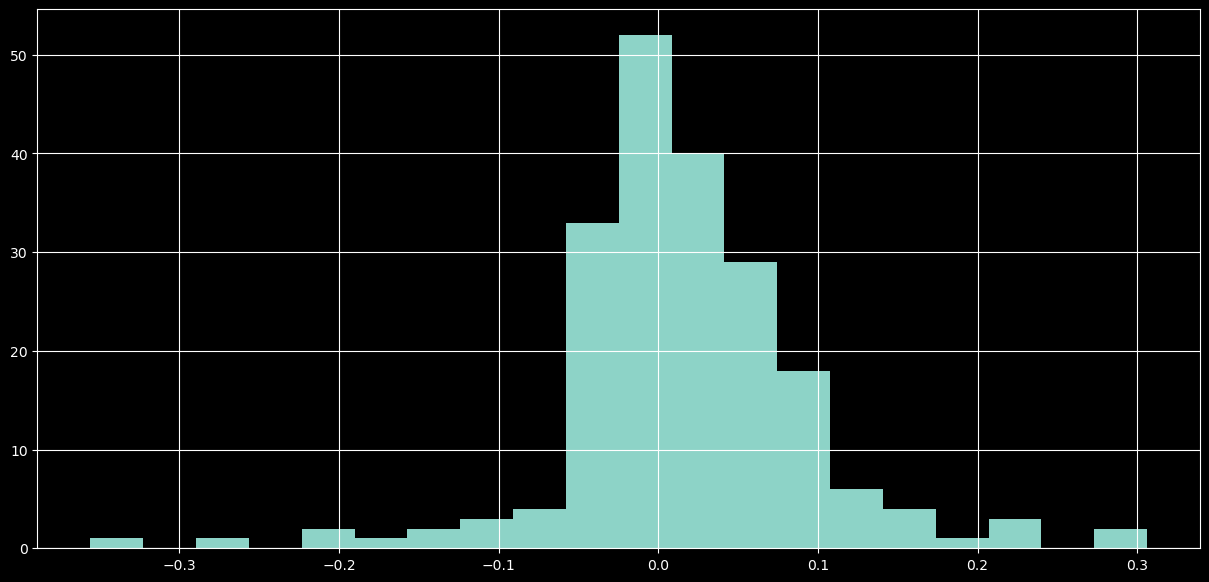

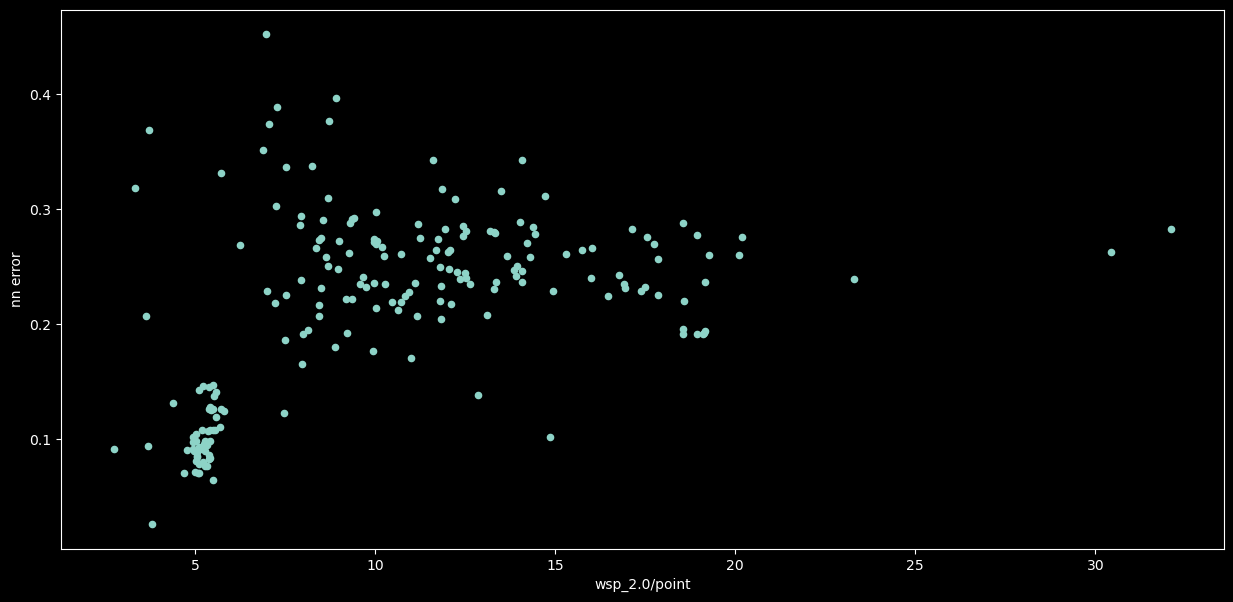

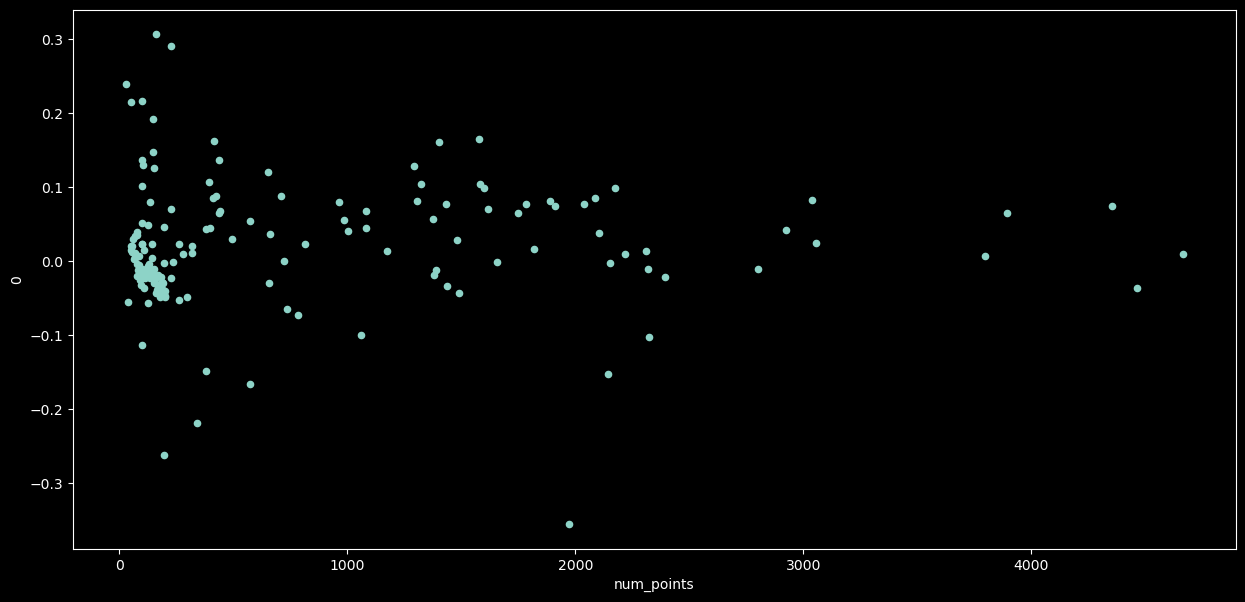

In [9]:
# df = df.drop("dj38") # outlier screws up how graph renders r^2 is 0.88 w/o them
# df = df.drop("dkd1973")

(df["nn error"] / df["wsp_2.0/point"]).plot.box()

df.plot.scatter("num_points", "nn error")
df.plot.scatter("wsp_count_2.0", "nn error")

# for k, v in df.iterrows():
#     ax.annotate(k, (v["wsp_2.0/point"], v["nn error"]))

results = sm.OLS(df["nn error"].astype(float), df[["wsp_1.0/point", "wsp_2.0/point", "wsp_4.0/point", "wsp_8.0/point"]].astype(float)).fit()

print(results.params)
print(f"Average residual is {100 * sum(abs(results.resid)) / len(results.resid)}%")
print(f"50pp residual is {100 * sorted(abs(results.resid))[len(results.resid) // 2]}% and 75pp residual is {100 * sorted(abs(results.resid))[len(results.resid) * 3 // 4]}%")
fig, ax = plt.subplots(figsize=(15,7))
results.resid.hist(bins=20)

fig, ax = plt.subplots(figsize=(15,7))
df.plot.scatter("wsp_2.0/point", "nn error", ax=ax)

temp = pd.concat([df["num_points"], results.resid], axis=1)
temp[temp['num_points'] <= 5000].plot.scatter("num_points", 0, figsize=(15,7))

results.summary()

## Plot analysis of WSPs hardness wrt. local search based on nearest neighbour

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               ls error   R-squared (uncentered):                   0.859
Model:                            OLS   Adj. R-squared (uncentered):              0.857
Method:                 Least Squares   F-statistic:                              432.2
Date:                Thu, 30 May 2024   Prob (F-statistic):                    6.52e-32
Time:                        13:41:45   Log-Likelihood:                          149.14
No. Observations:                  72   AIC:                                     -296.3
Df Residuals:                      71   BIC:                                     -294.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
wsp_2.0/point     0.0073      0.000     20.790      0.000       0.007       0.008
==============================================================================
Omnibus:                        2.220   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.330   Jarque-Bera (JB):                1.452
Skew:                          -0.048   Prob(JB):                        0.484
Kurtosis:                       2.311   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

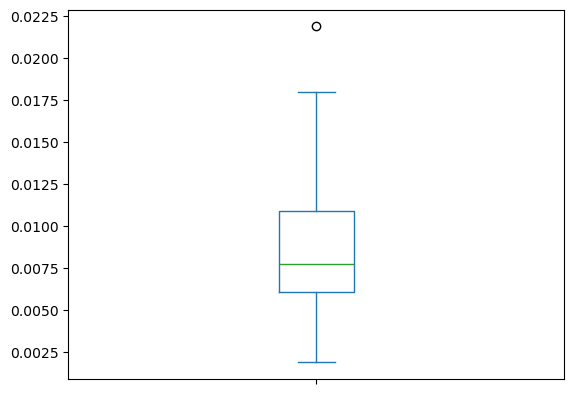

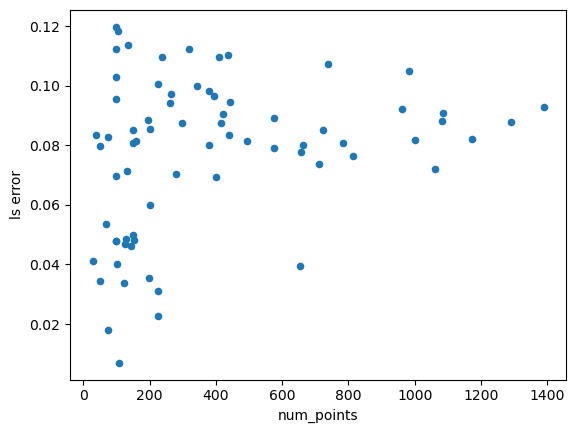

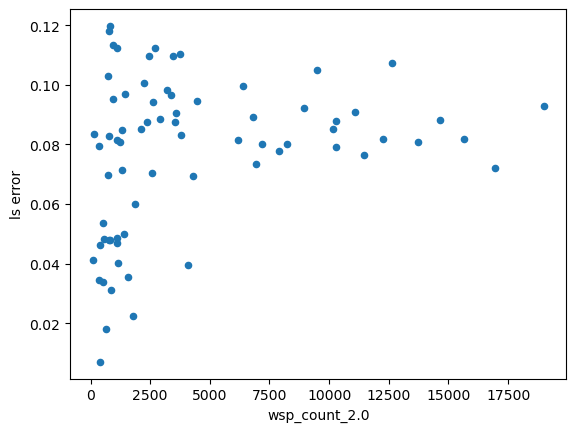

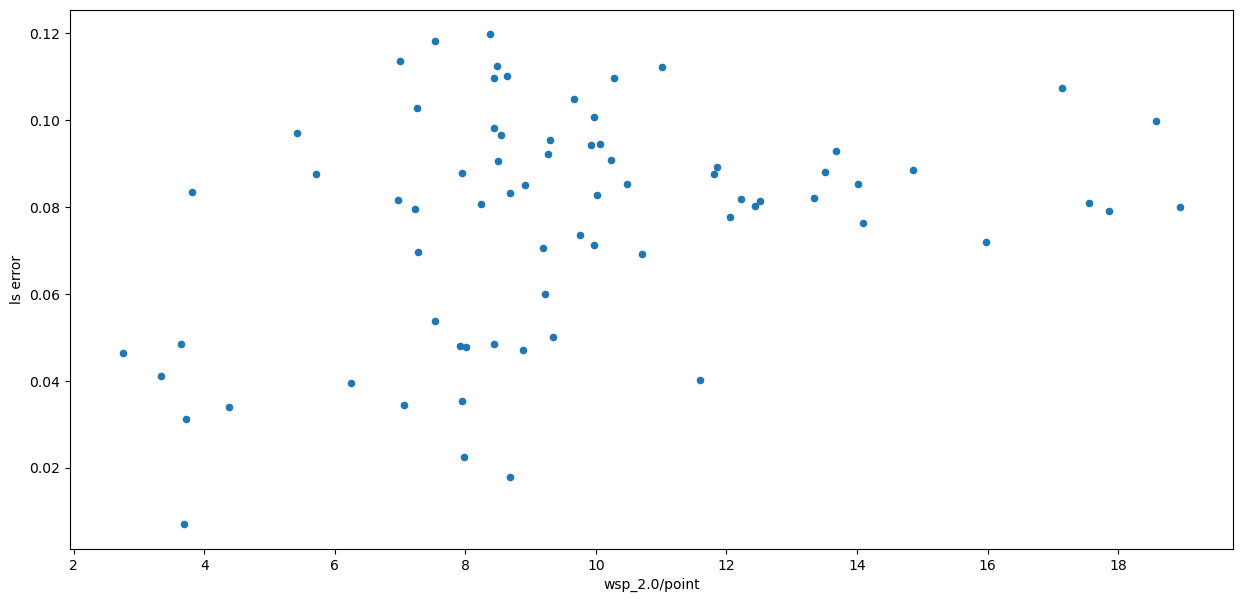

In [6]:
dfs = df[~df['ls_len'].isna()] # remove problems without optimal lens

(dfs["ls error"] / dfs["wsp_2.0/point"]).plot.box()

dfs.plot.scatter("num_points", "ls error")
dfs.plot.scatter("wsp_count_2.0", "ls error")
fig, ax = plt.subplots(figsize=(15,7))
dfs.plot.scatter("wsp_2.0/point", "ls error", ax=ax)

# for k, v in dfs.iterrows():
#     ax.annotate(k, (v["wsp_2.0/point"], v["nn error"]))

sm.add_constant(1)
results = sm.OLS(dfs["ls error"].astype(float), dfs["wsp_2.0/point"].astype(float)).fit()
results.summary()

## Plot analysis of WSPs hardness wrt. quick local search based on nearest neighbour

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              lsq error   R-squared (uncentered):                   0.848
Model:                            OLS   Adj. R-squared (uncentered):              0.845
Method:                 Least Squares   F-statistic:                              394.7
Date:                Thu, 30 May 2024   Prob (F-statistic):                    1.03e-30
Time:                        13:41:45   Log-Likelihood:                          97.914
No. Observations:                  72   AIC:                                     -193.8
Df Residuals:                      71   BIC:                                     -191.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
wsp_2.0/point     0.0142      0.001     19.866      0.000       0.013       0.016
==============================================================================
Omnibus:                        5.196   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                5.735
Skew:                           0.288   Prob(JB):                       0.0568
Kurtosis:                       4.257   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

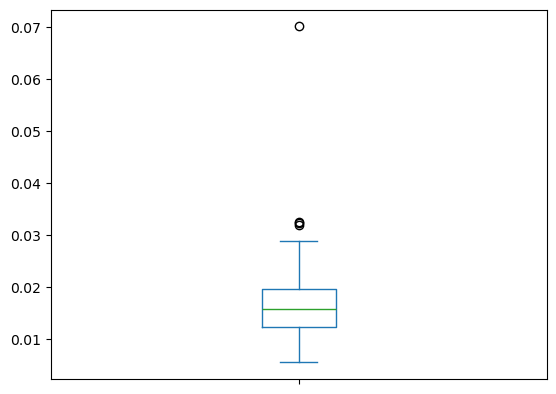

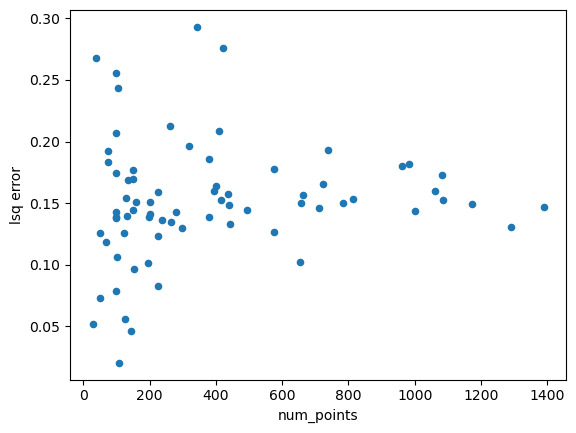

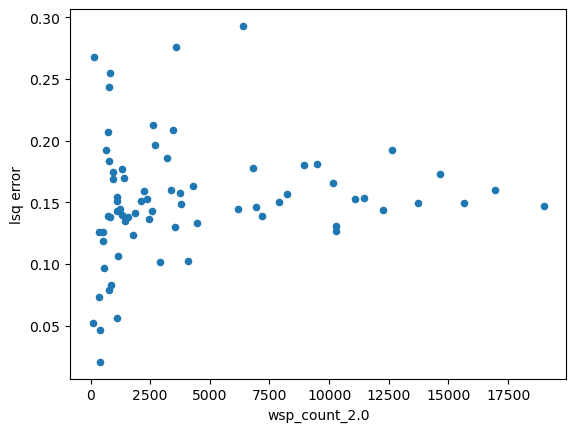

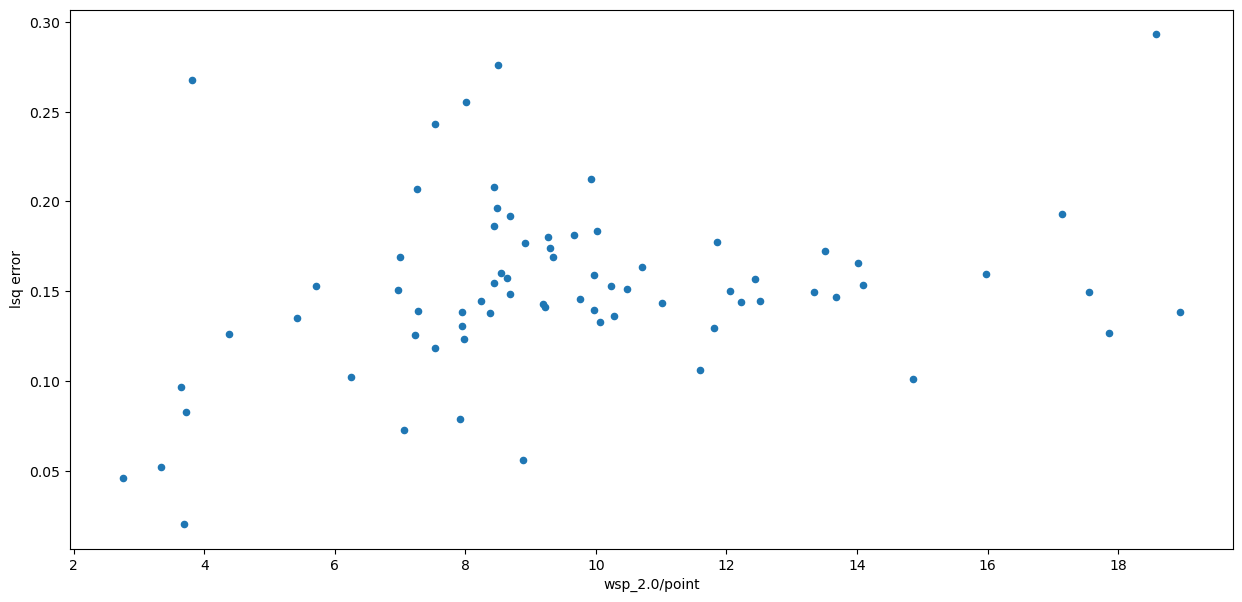

In [7]:
dfs = df[~df['ls_q_len'].isna()] # remove problems without optimal lens

(dfs["lsq error"] / dfs["wsp_2.0/point"]).plot.box()

dfs.plot.scatter("num_points", "lsq error")
dfs.plot.scatter("wsp_count_2.0", "lsq error")
fig, ax = plt.subplots(figsize=(15,7))
dfs.plot.scatter("wsp_2.0/point", "lsq error", ax=ax)

results = sm.OLS(dfs["lsq error"].astype(float), dfs["wsp_2.0/point"].astype(float)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              lsq error   R-squared (uncentered):                   0.848
Model:                            OLS   Adj. R-squared (uncentered):              0.845
Method:                 Least Squares   F-statistic:                              394.7
Date:                Thu, 30 May 2024   Prob (F-statistic):                    1.03e-30
Time:                        13:41:45   Log-Likelihood:                          97.914
No. Observations:                  72   AIC:                                     -193.8
Df Residuals:                      71   BIC:                                     -191.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
wsp_2.0/point     0.0142      0.001     19.866      0.000       0.013       0.016
==============================================================================
Omnibus:                        5.196   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                5.735
Skew:                           0.288   Prob(JB):                       0.0568
Kurtosis:                       4.257   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

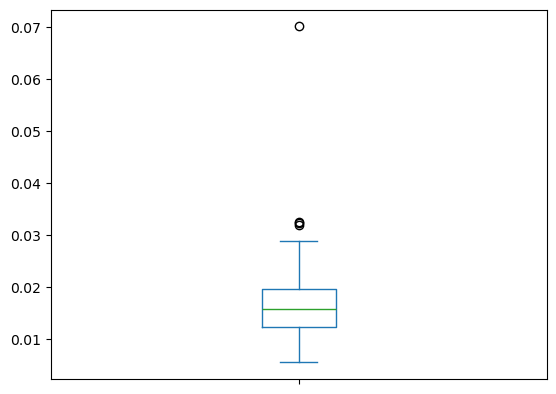

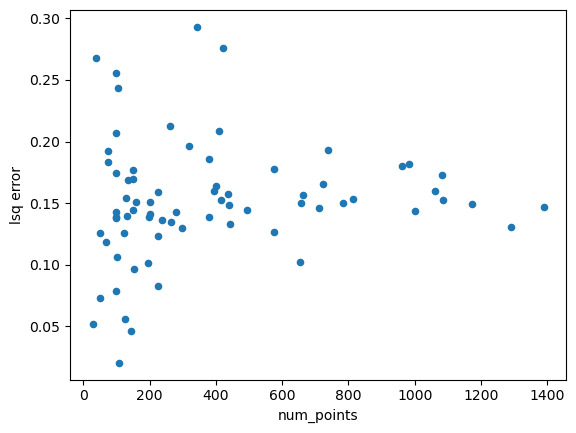

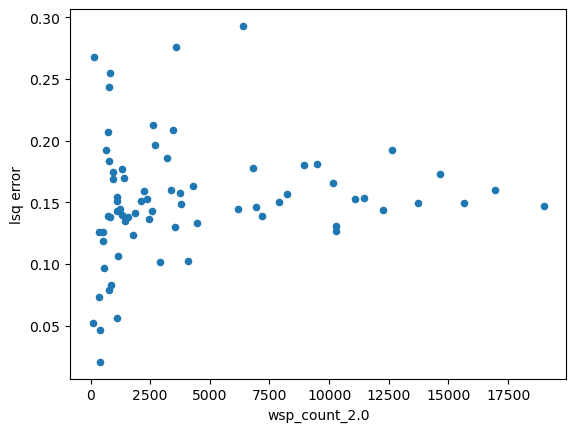

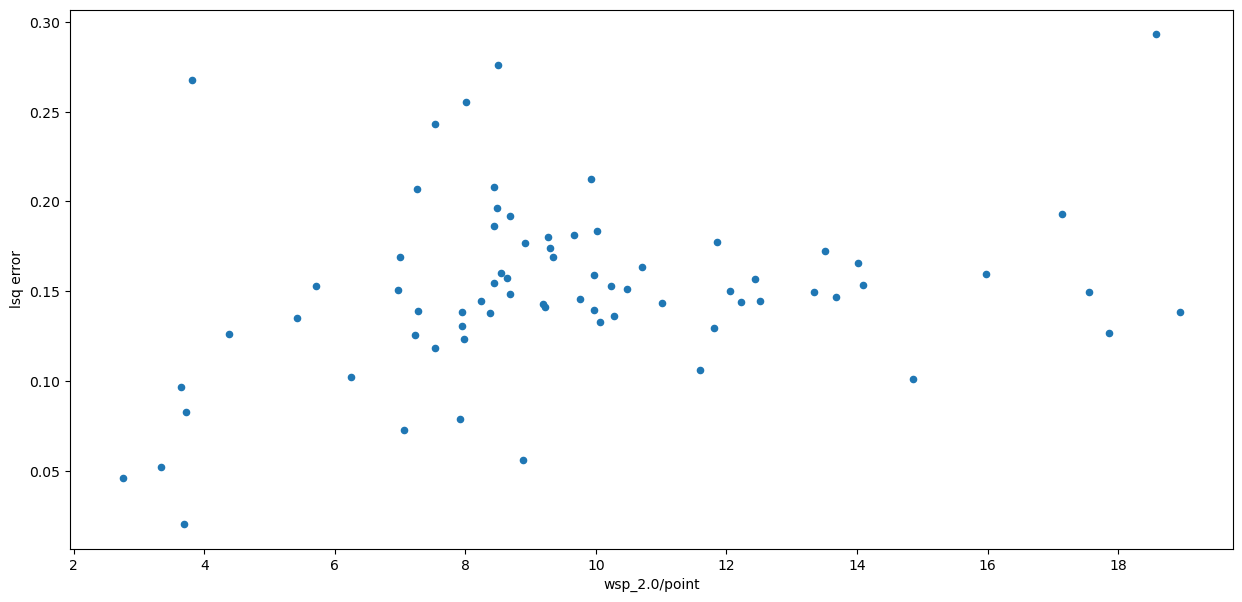

In [8]:
dfs = df[~df['ls_q_len'].isna()] # remove problems without optimal lens

(dfs["lsq error"] / dfs["wsp_2.0/point"]).plot.box()

dfs.plot.scatter("num_points", "lsq error")
dfs.plot.scatter("wsp_count_2.0", "lsq error")
fig, ax = plt.subplots(figsize=(15,7))
dfs.plot.scatter("wsp_2.0/point", "lsq error", ax=ax)

results = sm.OLS(dfs["lsq error"].astype(float), dfs["wsp_2.0/point"].astype(float)).fit()
results.summary()